___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [26]:
import pandas as pd

ri = pd.read_csv('df-02.csv', index_col=0)

ri.head()

C:\Users\ozlem\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,combined,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-0201:55,False
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-0220:30,False
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,19.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-0412:55,False
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,NaN,NaN,500,M,1978.0,27.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-0601:30,False
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,NaN,NaN,0,M,1973.0,32.0,...,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-1208:05,False


In [27]:
ri["is_arrested"].mean()

0.03454755048024903

In [28]:
ri["is_arrested"].value_counts()


False    463981
True      16603
Name: is_arrested, dtype: int64

In [29]:
ri['stop_datetime'] = pd.to_datetime(ri.index, format = '%Y-%m-%d %H:%M:%S')

ri.set_index("stop_datetime", inplace = True)

In [30]:
ri['hours'] = ri.index.hour

In [31]:
hourly_arrest_rate = ri[ri["is_arrested"] == True].groupby('hours')['is_arrested'].count()
hourly_arrest_rate / hourly_arrest_rate.sum()

hours
0     0.084021
1     0.091851
2     0.054388
3     0.018250
4     0.004457
5     0.002229
6     0.013732
7     0.019996
8     0.032103
9     0.053785
10    0.061013
11    0.051196
12    0.036198
13    0.046437
14    0.056014
15    0.050593
16    0.040173
17    0.034271
18    0.027344
19    0.025417
20    0.041318
21    0.026441
22    0.048847
23    0.079925
Name: is_arrested, dtype: float64

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

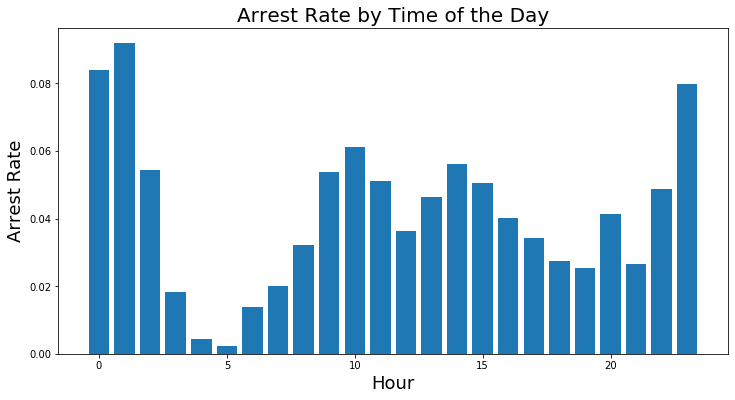

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))


ax.bar(hourly_arrest_rate.index, hourly_arrest_rate.values / hourly_arrest_rate.values.sum())

ax.set_xlabel('Hour', fontsize = 18)
ax.set_ylabel('Arrest Rate', fontsize = 18)
ax.set_title('Arrest Rate by Time of the Day', fontsize = 20)

plt.show()

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [33]:
annual_drug_rate = ri["drugs_related_stop"].resample('A').mean()
annual_drug_rate

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

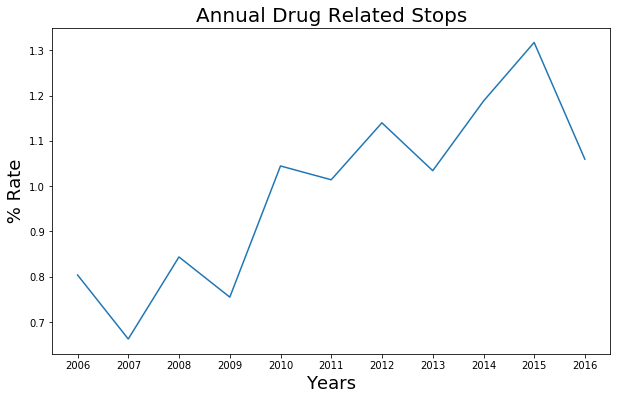

In [34]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(annual_drug_rate.index, annual_drug_rate.values * 100)

ax.set_xlabel('Years', fontsize = 18)
ax.set_ylabel(' % Rate ', fontsize = 18)
ax.set_title('Annual Drug Related Stops',fontsize = 20)

plt.show()

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [35]:
annual_search_rate = ri["search_conducted"].resample('A').mean()
annual_search_rate

stop_datetime
2005-12-31    0.050692
2006-12-31    0.037748
2007-12-31    0.041844
2008-12-31    0.039544
2009-12-31    0.049849
2010-12-31    0.042089
2011-12-31    0.037767
2012-12-31    0.032278
2013-12-31    0.029054
2014-12-31    0.030157
2015-12-31    0.027832
Freq: A-DEC, Name: search_conducted, dtype: float64

In [36]:
annual = pd.concat([annual_drug_rate,annual_search_rate], axis = 1)
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.008038,0.050692
2006-12-31,0.006624,0.037748
2007-12-31,0.008437,0.041844
2008-12-31,0.007549,0.039544
2009-12-31,0.010447,0.049849
2010-12-31,0.010142,0.042089
2011-12-31,0.011400,0.037767
2012-12-31,0.010343,0.032278
2013-12-31,0.011879,0.029054


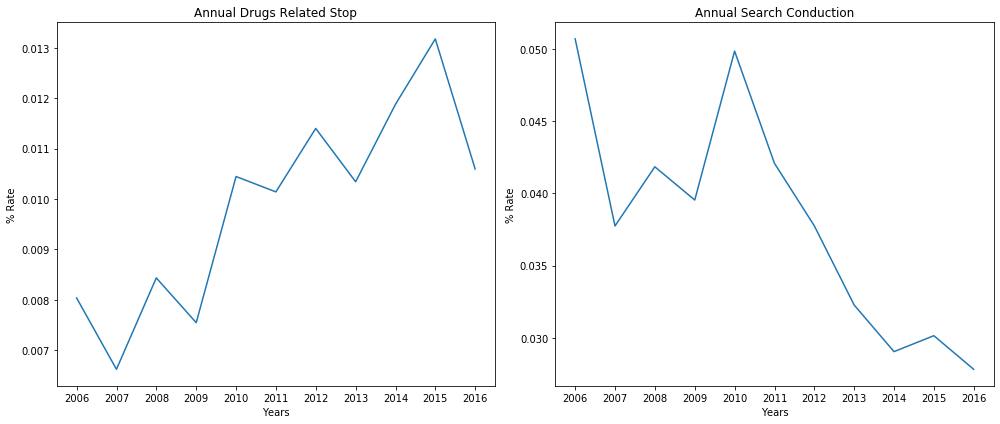

In [37]:
fig, ax = plt.subplots(1,2, figsize= (14,6))

ax[0].plot(annual.index, annual["drugs_related_stop"])
ax[0].set_xlabel("Years")
ax[0].set_ylabel("% Rate")
ax[0].set_title("Annual Drugs Related Stop")


ax[1].plot(annual.index,annual["search_conducted"])
ax[1].set_xlabel("Years")
ax[1].set_ylabel("% Rate")
ax[1].set_title("Annual Search Conduction")



plt.tight_layout()

plt.show()

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [38]:
all_zones = pd.crosstab(ri["district"], ri["violation"])

k_zones = all_zones.loc[['Zone K1', 'Zone K2', 'Zone K3']] 

k_zones.sum(axis = 1)

district
Zone K1     46110
Zone K2     97281
Zone K3    108868
dtype: int64

***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

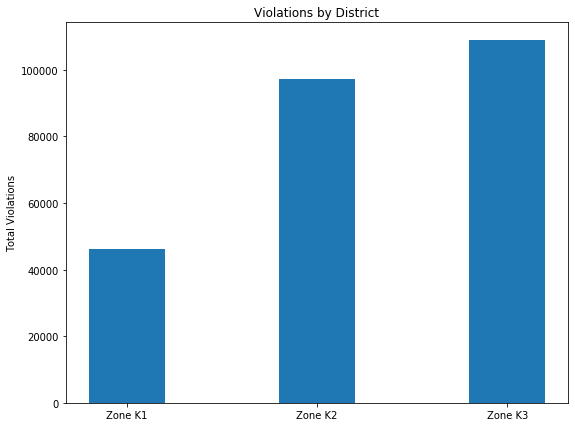

In [39]:
fig, ax = plt.subplots(figsize = (9,7))

lables = k_zones.index
values = k_zones.sum(axis = 1)

ax.bar(lables, values, width = 0.4)
ax.set_ylabel('Total Violations')
ax.set_title("Violations by District")



plt.show()

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

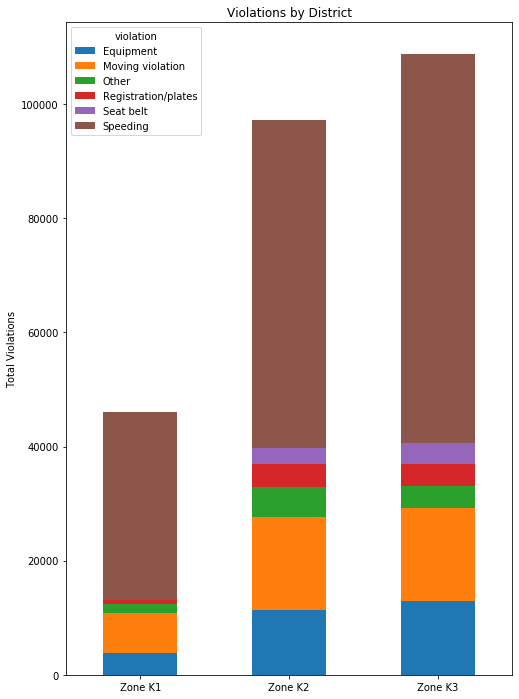

In [40]:
k_zones[k_zones.columns].plot(kind='bar', stacked=True, figsize = (8,12), rot = 0)
plt.title("Violations by District")
plt.ylabel('Total Violations')
plt.xlabel('')
plt.show()

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [41]:
ri["stop_duration"].value_counts()
# the values 1 and 2 will be dpopped
indexName = ri[(ri["stop_duration"] == '1') | (ri["stop_duration"] == '2')].index

ri.drop(indexName, inplace =True)

In [42]:
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}
mapping

{'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

In [43]:
ri["stop_minute"] = ri["stop_duration"].map(mapping)

In [44]:
ri["stop_minute"].unique()

array([ 8, 23, 45], dtype=int64)

***

## Plotting stop length

If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the **average length** of time drivers are stopped for each **type** of **violation**. Rather than using the ``violation`` column in this exercise, you'll use ``violation_raw`` since it contains more detailed descriptions of the violations.

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

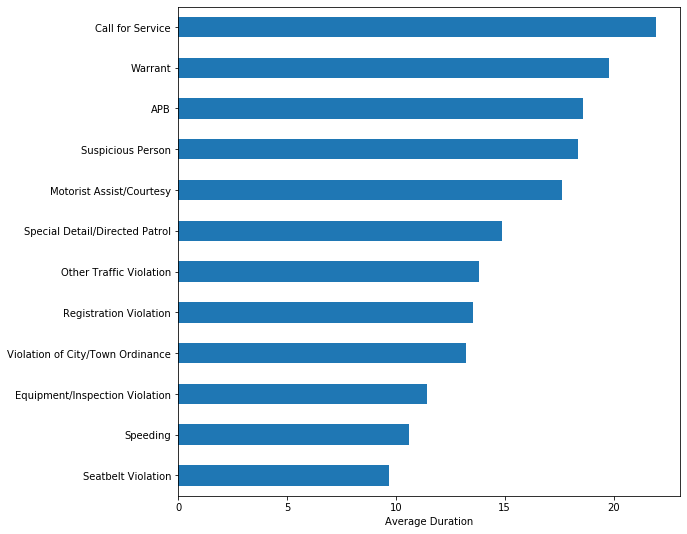

In [45]:
stop_length = ri.groupby("violation_raw")["stop_minute"].mean()

stop_length.sort_values().plot(kind = 'barh', figsize = (9,9))
plt.ylabel("")
plt.xlabel("Average Duration")

plt.show()




In [48]:
ri.to_csv('df-03.csv')

In [47]:
ri

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,combined,frisk,hours,stop_minute
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,Citation,False,0-15 Min,False,False,Zone K1,2005-01-0201:55,False,1,8
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,Citation,False,16-30 Min,False,False,Zone X4,2005-01-0220:30,False,20,23
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,19.0,...,Citation,False,0-15 Min,False,False,Zone X4,2005-01-0412:55,False,12,8
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,NaN,NaN,500,M,1978.0,27.0,...,Citation,False,0-15 Min,False,False,Zone X4,2005-01-0601:30,False,1,8
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,NaN,NaN,0,M,1973.0,32.0,...,Citation,False,30+ Min,True,False,Zone X1,2005-01-1208:05,False,8,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 22:46:00,RI-2015-47061,2015-12-31,22:46,Zone X1,NaN,NaN,0,M,1959.0,56.0,...,Citation,False,0-15 Min,True,False,Zone X1,2015-12-3122:46,False,22,8
2015-12-31 22:47:00,RI-2015-47062,2015-12-31,22:47,Zone X4,NaN,NaN,500,M,1988.0,27.0,...,Citation,False,0-15 Min,False,False,Zone X4,2015-12-3122:47,False,22,8
2015-12-31 23:08:00,RI-2015-47063,2015-12-31,23:08,Zone X3,NaN,NaN,200,M,1980.0,35.0,...,Citation,False,0-15 Min,False,False,Zone X3,2015-12-3123:08,False,23,8
